In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

# from xgboost import XGBClassifier
import pickle

import warnings
warnings.filterwarnings("ignore")

In [2]:
import random
random.seed(42)

In [3]:
df = pd.read_csv('./url_updated.csv')

In [4]:
df['label'].value_counts(normalize=True)

1    0.505267
0    0.494733
Name: label, dtype: float64

In [5]:
x = df[['hostname_length','url_length',
       'path_length', 'fd_length', 'spcl_char', 'count-http','count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir','path_entropy','subdomain']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(x,y,random_state = 42, stratify = y )


In [6]:
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)

X_test_sc = ss.transform(X_test)

In [7]:
def get_scores_sc(model):
    
    # instantiate model
    model = model()
    
    # fit to scaled data
    model.fit(X_train_sc, y_train)
    
    # make predictions
    preds = model.predict(X_test_sc)

    # print results
    print(f'{model} Training Score: {model.score(X_train_sc, y_train)}')
    print(f'{model} Testing Score: {model.score(X_test_sc, y_test)}')
    print()
    print(classification_report(y_test, preds))
    print(confusion_matrix(y_test, preds))

    return

In [12]:
def get_scores(model):
    
    # instantiate model
    model = model()
    
    # fit to data
    model.fit(X_train, y_train)
    
    # make predictions
    preds = model.predict(X_test)

    # print results
    print(f'{model} Training Score: {model.score(X_train, y_train)}')
    print(f'{model} Testing Score: {model.score(X_test, y_test)}')
    print()
    print(classification_report(y_test, preds))
    print(confusion_matrix(y_test, preds))
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
    disp.plot(cmap = 'Reds', values_format='')
    return

In [25]:
get_scores_sc(LinearRegression)

LinearRegression() Training Score: 0.4343382920146178
LinearRegression() Testing Score: 0.42511618940222706



ValueError: Classification metrics can't handle a mix of binary and continuous targets

DecisionTreeClassifier() Training Score: 0.9978978271506497
DecisionTreeClassifier() Testing Score: 0.9171468957268675

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      9100
           1       0.91      0.93      0.92      9294

    accuracy                           0.92     18394
   macro avg       0.92      0.92      0.92     18394
weighted avg       0.92      0.92      0.92     18394

[[8244  856]
 [ 668 8626]]


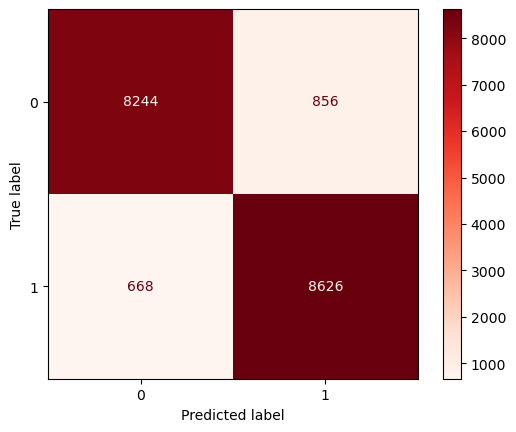

In [26]:
get_scores(DecisionTreeClassifier)

BaggingClassifier() Training Score: 0.9935122596545912
BaggingClassifier() Testing Score: 0.9298140698053713

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      9100
           1       0.93      0.93      0.93      9294

    accuracy                           0.93     18394
   macro avg       0.93      0.93      0.93     18394
weighted avg       0.93      0.93      0.93     18394

[[8421  679]
 [ 612 8682]]


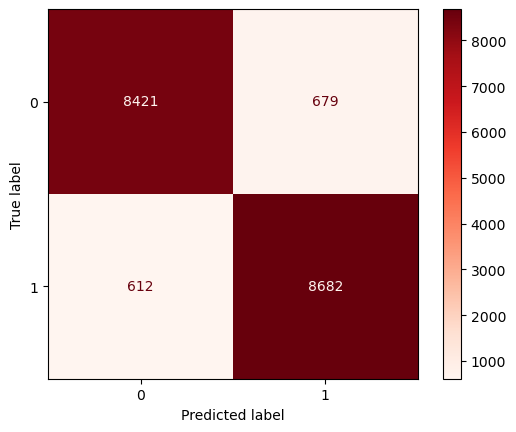

In [27]:
get_scores(BaggingClassifier)

KNeighborsClassifier() Training Score: 0.9108026313404977
KNeighborsClassifier() Testing Score: 0.8678917038164619

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      9100
           1       0.86      0.89      0.87      9294

    accuracy                           0.87     18394
   macro avg       0.87      0.87      0.87     18394
weighted avg       0.87      0.87      0.87     18394

[[7720 1380]
 [1050 8244]]


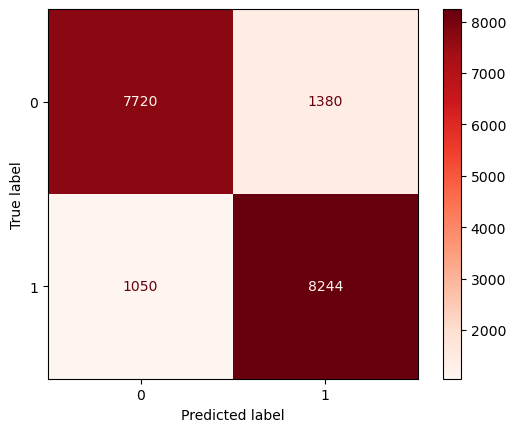

In [28]:
get_scores(KNeighborsClassifier)

DecisionTreeClassifier() Training Score: 0.9978978271506497
DecisionTreeClassifier() Testing Score: 0.9180167445906274

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      9100
           1       0.91      0.93      0.92      9294

    accuracy                           0.92     18394
   macro avg       0.92      0.92      0.92     18394
weighted avg       0.92      0.92      0.92     18394

[[8241  859]
 [ 649 8645]]


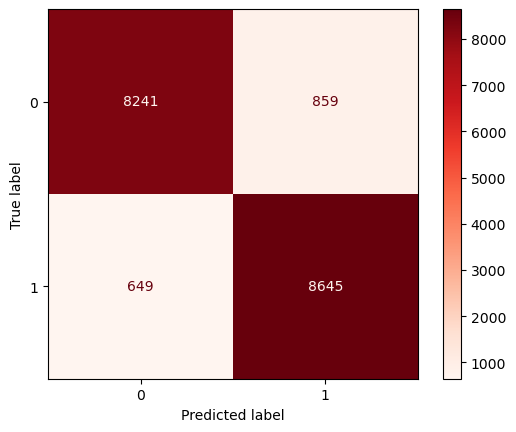

In [16]:
get_scores(DecisionTreeClassifier)

In [20]:
get_scores_sc(RandomForestClassifier)

RandomForestClassifier() Training Score: 0.9978797049709139
RandomForestClassifier() Testing Score: 0.9391105795368054

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      9100
           1       0.93      0.95      0.94      9294

    accuracy                           0.94     18394
   macro avg       0.94      0.94      0.94     18394
weighted avg       0.94      0.94      0.94     18394

[[8444  656]
 [ 464 8830]]


### Model Optimization

In [12]:
rfc = RandomForestClassifier()
rfc_params = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600]}

rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = rfc_params, cv = 2, verbose=2, random_state=42, 
                                n_jobs = -1)
rfc_random.fit(X_train, y_train)
print(f'Best Parameters: {rfc_random.best_params_}')

Training Score: 0.9978978271506497
Testing Score: 0.9404697183864303

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      9100
           1       0.93      0.95      0.94      9294

    accuracy                           0.94     18394
   macro avg       0.94      0.94      0.94     18394
weighted avg       0.94      0.94      0.94     18394

[[8438  662]
 [ 433 8861]]


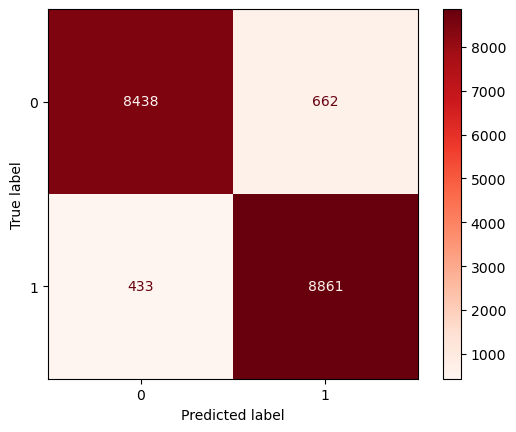

In [34]:
rfc = RandomForestClassifier(n_estimators = 1000, min_samples_split= 2, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 90, 
                             bootstrap= True, n_jobs= -1, random_state=42)
rfc.fit(X_train, y_train)

preds = rfc.predict(X_test)
print(f'Training Score: {rfc.score(X_train, y_train)}')
print(f'Testing Score: {rfc.score(X_test, y_test)}')
print()
print(classification_report(y_test,preds))
print(confusion_matrix(y_test, preds))

cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rfc.classes_)
disp.plot(cmap = 'Reds', values_format='')

In [14]:
# Create feature list
feature_list = list(x.columns)

# Get numerical feature importances
importances = list(rfc.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: count-https          Importance: 0.573
Variable: count-www            Importance: 0.2
Variable: subdomain            Importance: 0.094
Variable: hostname_length      Importance: 0.032
Variable: count-http           Importance: 0.023
Variable: spcl_char            Importance: 0.016
Variable: path_length          Importance: 0.012
Variable: count-letters        Importance: 0.011
Variable: fd_length            Importance: 0.01
Variable: url_length           Importance: 0.009
Variable: count-digits         Importance: 0.009
Variable: count_dir            Importance: 0.005
Variable: path_entropy         Importance: 0.005


[None, None, None, None, None, None, None, None, None, None, None, None, None]